Machine Learning II: Clustering

In [1]:
import pandas as pd

# Voting dataset

In [2]:
df = pd.read_csv ("C:/Users/lemmerfn/Documents/Lehre/methodenseminar/data/vote.csv", na_values="?")
df

,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y
5,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y
6,democrat,n,y,n,y,y,y,n,n,n,n,n,n,NaN,y,y,y
7,republican,n,y,n,y,y,y,n,n,n,n,n,n,y,y,NaN,y
8,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,y
9,democrat,y,y,y,n,n,n,y,y,y,n,n,n,n,n,NaN,NaN


## Visualize this data using PCA transformation and a scatter plot
For the transformation, exclude the party variable. Instead color the instances after PCA according to their party membership!

In [3]:
#get the the data as a 0/1 numpy array
from sklearn import preprocessing
y = preprocessing.LabelEncoder().fit_transform(df["party"].values)
df_features = df.drop(["party"], axis=1)
df_features = pd.get_dummies(df_features)
X = df_features.values
X

array([[1, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 1],
       [1, 0, 1, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 1, 0]], dtype=uint8)

In [4]:
#Apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_pca

array([[ 2.44406663,  0.06933457],
       [ 2.52002404,  0.52100864],
       [ 1.33897864,  1.79429615],
       [ 0.4731271 ,  1.72487013],
       [ 0.70035139,  1.75667367],
       [ 0.86580346,  0.90244601],
       [ 1.52984062,  0.55295235],
       [ 1.89791109,  0.5993927 ],
       [ 2.47214888,  0.37835768],
       [-2.12155314,  0.63649939],
       [ 2.0008673 ,  0.90397009],
       [ 2.05149485,  1.31487209],
       [-1.45817546,  0.47909613],
       [-1.59733484,  0.8056753 ],
       [ 2.1211196 ,  0.57802163],
       [ 2.33600564, -0.01948744],
       [-0.56226234,  0.01941849],
       [-1.98776291,  0.19726972],
       [ 2.40970043,  0.6776492 ],
       [-2.43540273,  1.16608228],
       [-1.82871344,  1.45914757],
       [-1.94372165,  0.48059527],
       [-2.17999846, -0.01896832],
       [-2.34112985,  0.50101179],
       [-2.36660103, -0.20067287],
       [-2.39595908, -0.99443661],
       [-2.50874907,  0.32174666],
       [-2.43540273,  1.16608228],
       [ 0.4640172 ,

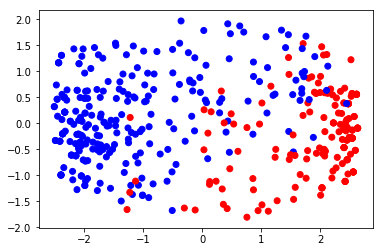

In [5]:
## Plot as a Scatter plot
import matplotlib.pyplot as plt
%matplotlib inline
#This one is just for getting red/blue colors
import matplotlib.cm as cm
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=cm.bwr)

## Apply kmeans-Clustering with k=2 on the voting data
What are the sizes (=number of instances) of the two clusters?

In [7]:
from sklearn.cluster import KMeans
clust = KMeans(n_clusters=2)
y_cl = clust.fit_predict(X)
pd.value_counts(y_cl)

0    236
1    199
dtype: int64

## Plot as a scatter plot the clustering results using the PCA transformation

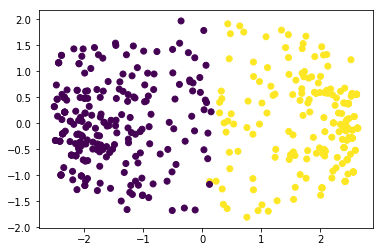

In [8]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_cl)

## Find a simple cluster description by computing the most correlated features with respect to the cluster_id

In [9]:
df["cluster_id"] = y_cl
# First, convert to 1-0 features
# Then, compute a correlation table and select the interesting column
# Then sort and remove correlation to itself
pd.get_dummies(df).corr()["cluster_id"].sort_values(ascending=False)[1:-1]

el-salvador-aid_y                           0.867938
aid-to-nicaraguan-contras_n                 0.821838
physician-fee-freeze_y                      0.808068
party_republican                            0.759577
mx-missile_n                                0.755616
adoption-of-the-budget-resolution_n         0.744185
crime_y                                     0.704171
anti-satellite-test-ban_n                   0.689787
education-spending_y                        0.687501
superfund-right-to-sue_y                    0.677809
religious-groups-in-schools_y               0.577391
duty-free-exports_n                         0.568181
handicapped-infants_n                       0.444937
export-administration-act-south-africa_n    0.430788
synfuels-corporation-cutback_n              0.181648
water-project-cost-sharing_y                0.127981
immigration_n                               0.009380
immigration_y                               0.001719
water-project-cost-sharing_n               -0.

## Repeat k-means clustering with k=10
Plot as a colored scatter plot and give a description for one of the clusters

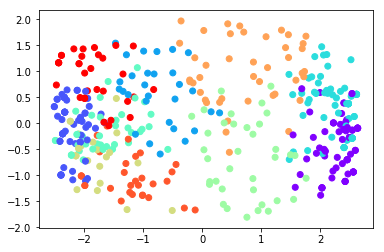

In [10]:
clust = KMeans(n_clusters=10)
y_cl = clust.fit_predict(X)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_cl, cmap=cm.rainbow)

In [11]:
df ["cluster_id"] = y_cl

# we need to split the cluster_id into separate features to compute correlation with a single feature
df["cluster_id"] = df["cluster_id"].astype("category")
df_dummies = pd.get_dummies(df)

df_dummies.corr()["cluster_id_5"].sort_values(ascending=False)[1:]

party_republican                            0.310125
physician-fee-freeze_y                      0.277727
el-salvador-aid_y                           0.241298
crime_y                                     0.210269
anti-satellite-test-ban_y                   0.154628
water-project-cost-sharing_n                0.119478
synfuels-corporation-cutback_n              0.105087
education-spending_y                        0.099903
export-administration-act-south-africa_y    0.098555
religious-groups-in-schools_y               0.060153
handicapped-infants_n                       0.058099
immigration_y                               0.052135
superfund-right-to-sue_y                    0.045148
mx-missile_n                                0.032615
adoption-of-the-budget-resolution_n         0.014491
duty-free-exports_n                         0.012000
aid-to-nicaraguan-contras_n                -0.029375
adoption-of-the-budget-resolution_y        -0.049693
aid-to-nicaraguan-contras_y                -0.

## Apply DBSCAN to cluster the voting data
Play with the parameters "eps" and "min_samples" until you get two clusters. What are the outliers that do not belong to any cluster?

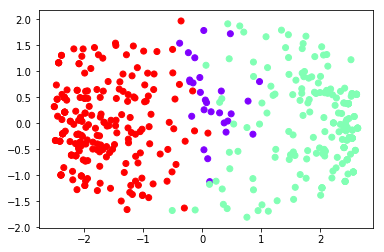

In [12]:
from sklearn.cluster import DBSCAN
clust = DBSCAN(eps=2.5, min_samples=12)
y_cl = clust.fit_predict(X)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_cl, cmap=cm.rainbow)


In [13]:
df ["cluster_id"] = y_cl
df [df["cluster_id"] == -1]

,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa,cluster_id
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y,-1
54,democrat,y,y,y,n,n,y,NaN,y,n,n,y,y,n,y,n,NaN,-1
73,republican,y,n,y,y,y,n,y,n,y,y,n,n,y,y,n,y,-1
94,democrat,y,n,y,n,y,y,n,n,n,n,n,n,n,n,n,y,-1
95,democrat,y,n,y,n,y,y,n,NaN,NaN,n,y,NaN,NaN,NaN,y,y,-1
97,democrat,y,n,n,n,y,y,y,n,n,y,y,n,n,y,n,y,-1
101,democrat,y,n,y,n,y,y,y,n,n,n,y,n,n,y,n,y,-1
102,democrat,y,n,y,n,y,y,y,n,NaN,n,y,n,y,y,y,NaN,-1
103,democrat,y,n,n,n,y,y,NaN,n,NaN,n,n,n,n,y,NaN,n,-1
107,republican,n,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,y,NaN,NaN,-1


# Country dataset

In [14]:
#read the data directly online:
data = pd.read_csv ("http://www.qogdata.pol.gu.se/data/qog_std_cs_jan17.csv")

In [15]:
df = data [["cname", "wdi_pop", "wdi_popgr", "wdi_gdpcapcur", "wdi_gdpcapgr", "wdi_area", "wdi_broadb", "ht_region"]]
df = df.rename (columns={"cname" : "name",
            "wdi_pop" : "population",
            "wdi_popgr" : "population_growth",
            "wdi_gdpcapcur" : "gdp_per_capita",
            "wdi_gdpcapgr" : "gdp_growth",
            "wdi_area" : "area",
            "wdi_broadb" : "internet",
            "ht_region" : "region"
           })
df ["population_density"] = df.population / df.area
df = df.dropna()
df.head()

,name,population,population_growth,gdp_per_capita,gdp_growth,area,internet,region,population_density
0,Afghanistan,30682500.0,3.164336,666.795044,-1.216695,652860.0,0.004910,8,46.997059
1,Albania,2897366.0,-0.107730,4411.258301,1.218984,27400.0,5.752928,1,105.743285
2,Algeria,38186136.0,1.974814,5491.614258,0.789805,2381740.0,3.264624,3,16.032873
3,Andorra,75902.0,-4.399684,42806.523438,4.431534,470.0,35.009720,5,161.493617
5,Antigua and Barbuda,89985.0,1.023164,13342.084961,-1.360684,440.0,17.388454,10,204.511364


## Cluster this data
...with respect to their population_growth, gdp_per_capita, gdp_growth, population_density, and internet (usage)

- Don't forget to scale the features!
- What is a good number of k for k-means?
- Visualize the clusters!

In [16]:
df_select = df [["population_growth", "gdp_per_capita", "gdp_growth", "population_density", "internet"]]
X = df_select.values

In [17]:
from sklearn.preprocessing import StandardScaler, RobustScaler
# We could use a StandardScaler as well, but here we choose "RobustScaler", which does some outlier handling
#X_scaled = StandardScaler().fit_transform(X)
X_scaled = RobustScaler().fit_transform(X)
X_scaled

array([[ 1.06631946e+00, -3.85975772e-01, -9.68559615e-01,
        -2.14744192e-01, -2.91004012e-01],
       [-7.72916603e-01, -1.17578111e-01, -2.09256977e-01,
         1.95074835e-01,  3.97167460e-02],
       [ 3.97686380e-01, -4.01397726e-02, -3.43050005e-01,
        -4.30753175e-01, -1.03451544e-01],
       [-3.18543459e+00,  2.63453845e+00,  7.92228878e-01,
         5.83994238e-01,  1.72304957e+00],
       [-1.37238670e-01,  5.22570509e-01, -1.01344694e+00,
         8.84089961e-01,  7.09183974e-01],
       [ 1.46881164e-02,  1.26154966e-01,  7.93953367e-01,
         2.52140629e-01,  7.55226283e-01],
       [-1.23803801e-01,  6.01487182e-01, -2.38605954e-02,
        -4.34165653e-01,  5.46764033e-01],
       [ 2.62492521e-01,  4.41368942e+00, -3.77670818e-01,
        -5.21599980e-01,  1.14721474e+00],
       [-3.84035311e-01,  3.19013898e+00, -6.71259897e-01,
         1.74135486e-01,  1.21973991e+00],
       [ 1.04775186e-01,  1.16577922e+00, -1.03240201e+00,
        -2.79277957e-01

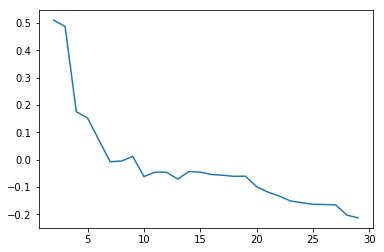

In [18]:
from sklearn import metrics
ks = range(2,30)
scores = []
for k in ks:
    clust = KMeans(n_clusters=k)
    y_cl = clust.fit_predict(X)
    scores.append(metrics.silhouette_score(X_scaled, y_cl, metric='euclidean'))
plt.plot(ks,scores)

In [19]:
clust = KMeans(n_clusters=6)
y_cl = clust.fit_predict(X_scaled)
df ["cluster_id"] = y_cl

In [20]:
df.head()

,name,population,population_growth,gdp_per_capita,gdp_growth,area,internet,region,population_density,cluster_id
0,Afghanistan,30682500.0,3.164336,666.795044,-1.216695,652860.0,0.004910,8,46.997059,0
1,Albania,2897366.0,-0.107730,4411.258301,1.218984,27400.0,5.752928,1,105.743285,0
2,Algeria,38186136.0,1.974814,5491.614258,0.789805,2381740.0,3.264624,3,16.032873,0
3,Andorra,75902.0,-4.399684,42806.523438,4.431534,470.0,35.009720,5,161.493617,4
5,Antigua and Barbuda,89985.0,1.023164,13342.084961,-1.360684,440.0,17.388454,10,204.511364,0


In [21]:
df.cluster_id.value_counts()

3    99
0    52
4    26
2     4
5     1
1     1
Name: cluster_id, dtype: int64

In [22]:
df.groupby("cluster_id").mean()

,population,population_growth,gdp_per_capita,gdp_growth,area,internet,region,population_density
cluster_id,,,,,,,,
0,2.213958e+07,1.163693,11401.370229,-0.954442,8.848057e+05,10.834762,4.711538,97.753768
1,5.399200e+06,1.620708,55979.757812,2.764137,7.070000e+02,27.595575,7.000000,7636.775106
2,3.983080e+07,1.346119,13802.613266,3.355673,3.289000e+04,15.682923,6.000000,1398.217639
3,4.835288e+07,1.573236,4388.210777,3.673627,5.103819e+05,4.950710,4.191919,115.347041
4,3.562768e+07,0.911374,54901.497371,0.615949,1.142019e+06,30.141395,4.769231,169.711086
5,4.710678e+06,1.954537,326.437103,-37.284927,6.229800e+05,0.013370,4.000000,7.561524


In [23]:
list (df[df.cluster_id == 3] ["name"])

['Azerbaijan',
 'Armenia',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Solomon Islands',
 'Myanmar',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Sri Lanka',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Congo, Democratic Republic',
 'Costa Rica',
 'Cuba',
 'Benin',
 'Dominican Republic',
 'Ecuador',
 'El Salvador',
 'Ethiopia (1993-)',
 'Eritrea',
 'Fiji',
 'Djibouti',
 'Gabon',
 'Georgia',
 'Gambia',
 'Ghana',
 'Kiribati',
 'Grenada',
 'Guatemala',
 'Guyana',
 'Haiti',
 'Honduras',
 'India',
 'Indonesia',
 'Iraq',
 "Cote d'Ivoire",
 'Kazakhstan',
 'Kenya',
 'Kyrgyzstan',
 'Laos',
 'Lesotho',
 'Latvia',
 'Liberia',
 'Lithuania',
 'Malawi',
 'Malaysia (1966-)',
 'Mauritania',
 'Mauritius',
 'Mongolia',
 'Moldova',
 'Montenegro',
 'Morocco',
 'Mozambique',
 'Namibia',
 'Nepal',
 'Nicaragua',
 'Niger',
 'Nigeria',
 'Marshall Islands',
 'Pakistan (1971-)',
 'Panama',
 'Papua New Guinea',
 'Paraguay',
 'Peru',
 'Philippines',
 'Romania',
 'Rwanda',
 'St Kitts and N